# Equiprobable Discretization of Bivariate Lognormals

Given a bivariate lognormal distribution specified by the parameters

$$ \mu = \begin{bmatrix}
            \mu_1\\
            \mu_2
        \end{bmatrix};\:\:
    \Sigma = \begin{bmatrix}
        \sigma_1^2 & \sigma_{12}\\
        \sigma_{21} & \sigma_2^2
        \end{bmatrix}
$$

we want to produce a discretized version of the distribution that allows us to approximate expectations of functions of these lognormal variables quicker than through a direct integral solution. I use the following process to construct an equiprobable approximation of the bivariate lognormal. Begin first with a standard bivariate normal distribution, i.e. the random vector $(Z_1,\,Z_2) \sim \mathcal{N}(\boldsymbol{0},\,I_{2\times 2})$. Define the following normally distributed variables:

$$
\begin{align*}
    Y_1 &= \mu_1 + \sigma_1 Z_1\\
    Y_2 &= \mu_2 + \frac{\sigma_{12}}{\sigma_1} Z_1 + Z_2\sqrt{\sigma_2^2 - \left(\frac{\sigma_{12}}{\sigma_1}\right)^2}
\end{align*}
$$

For this construction to be valid, we need to make sure that $\sigma_2^2 - \left(\frac{\sigma_{12}}{\sigma_1}\right)^2 \geq 0$. This is equivalent to $(\sigma_1\sigma_2)^2 \geq \sigma_{12}^2$. Since $\Sigma$ is a covariance matrix, it is symmetric, which means that $\sigma_{12}^2 = \sigma_{12}\sigma_{21}$. Further, by positive semi-definiteness, $|\Sigma| \geq 0$, which is equivalent to $\sigma_{12}^2 \leq (\sigma_1\sigma_2)^2$.

Since $Z_1$ and $Z_2$ are jointly normally distributed, $Y_1$ and $Y_2$ are also jointly normal. $\mathbb{E}[Y_1] = \mu_1$ and $\text{Var}(Y_1) = \sigma_1^2$. Similarly, $\mathbb{E}[Y_2] = \mu_2$. The only thing of which we must make sure is that $\text{Cov}(Y_1,\,Y_2) = \sigma_{12}$ and $\text{Var}(Y_2) = \sigma_2^2$. The covariance between $Y_1$ and $Y_2$ is purely driven by the component in $Z_1$, which means:

$$
\begin{align*}
    \text{Cov}(Y_1,\,Y_2) &= \text{Cov}\left(\sigma_1 Z_1,\,\frac{\sigma_{12}}{\sigma_{1}}Z_1\right)\\
    &= \sigma_{12}\text{Var}(Z_1)\\
    &= \sigma_{12}
\end{align*}
$$

For variance:

$$
\begin{align*}
    \text{Var}(Y_2) &= \left(\frac{\sigma_{12}}{\sigma_{1}}\right)^2  + \left[\sigma_2^2 - 
    \left(\frac{\sigma_{12}}{\sigma_{1}}\right)^2\right]\\
    &= \sigma_2^2
\end{align*}
$$

Thus $(Y_1,\,Y_2) \sim \mathcal{N}(\mu,\,\Sigma)$. As a result, setting $X_1 = \exp{(Y_1)}$ and $X_2 = \exp{(Y_2)}$ gives $(X_1,\,X_2)$ jointly lognormally distributed with parameters $\mu$ and $\Sigma$.

The discretization then proceeds as follows. As we discretize the distribution to $n^2$ equiprobable points, we first construct an equiprobable $n$-grid of the standard normal. Given that $Z_1$ and $Z_2$ are independent, a square grid of this formulation gives an equiprobable $n^2$-grid over the standard bivariate normal. Each of these squares naturally correspond to a $n^{-2}$ probability grid in the space of the bivariate lognormal random variables $(X_1,\,X_2)$. Now, we take the conditional expectation of $(X_1,\,X_2)$ in each of these squares. For $X_1$:

$$
\begin{align*}
    n^2\int_{\underline{z}_2}^{\overline{z}_2}\int_{\underline{z}_1}^{\overline{z}_1}X_1(z_1,\,z_2)f_{Z_1,\,Z_2}(z_1,\,z_2)dz_1dz_2 &= n^2\int_{\underline{z}_2}^{\overline{z}_2}\int_{\underline{z}_1}^{\overline{z}_1}(\mu_1 + \sigma_1Z_1)f_{Z_1}(z_1)f_{Z_2}(z_2)dz_1dz_2\\
    &= n^2\int_{\underline{z}_2}^{\overline{z}_2}f_{Z_2}(z_2)\left(\int_{\underline{z}_1}^{\overline{z}_1}(\mu_1 + \sigma_1Z_1)f_{Z_1}(z_1)dz_1\right)dz_2\\
    &= n^2\left(\int_{\underline{z}_1}^{\overline{z}_1}(\mu_1 + \sigma_1Z_1)f_{Z_1}(z_1)dz_1\right)\left(\int_{\underline{z}_2}^{\overline{z}_2}f_{Z_2}(z_2)dz_2\right)\\
    &= \frac{n^2}{n}\int_{\underline{z}_1}^{\overline{z}_1}(\mu_1 + \sigma_1Z_1)f_{Z_1}(z_1)dz_1\\
    &= n\int_{\exp{(\mu_1 + \sigma_1\underline{z}_1)}}^{\exp{(\mu_1 + \sigma_1\overline{z}_1)}}x_1f_{X_1}(x_1)dx_1
\end{align*}
$$

Likewise, the expectation of $X_2$ can be written as:
$$
\begin{align*}
    n^2\int_{\underline{z}_2}^{\overline{z}_2}\int_{\underline{z}_1}^{\overline{z}_1}X_2(z_1,\,z_2)f_{Z_1,\,Z_2}(z_1,\,z_2)dz_1dz_2 &= n^2\exp{(\mu_2)}\left(\int_{\underline{z}_1}^{\overline{z}_1}\exp{\left(\frac{\sigma_{12}}{\sigma_{1}}z_1\right)}f_{Z_1}(z_1)dz_1\right)\\
    &\left(\int_{\underline{z}_2}^{\overline{z}_2}\exp\left(\sqrt{\sigma_2^2 - \left(\frac{\sigma_{12}}{\sigma_2}\right)^2}z_2\right)f_{Z_2}(z_2)dz_2\right)\\
    &= n^2\exp(\mu_2)\left(\int_{\underline{\tilde{x}}_1}^{\overline{\tilde{x}}_1}\tilde{x}_1f_{\tilde{X}_1}(\tilde{x}_1)d\tilde{x}_1\right)\left(\int_{\underline{\tilde{x}}_2}^{\overline{\tilde{x}}_2}\tilde{x}_2f_{\tilde{X}_2}(\tilde{x}_2)d\tilde{x}_2\right)
\end{align*}
$$
Where $\tilde{X}_1 = \frac{\sigma_{12}}{\sigma_1}Z_1$ and $\tilde{X}_2 = \sqrt{\sigma_2^2 - \frac{\sigma_{12}^2}{\sigma_{1}^{2}}}Z_2$. To speed up the computation, we use the formula below for evaluating expectations of lognormally distributed variables within intervals. Given $\log(X) \sim \mathcal{N}(\mu,\,\sigma)$:
$$
\begin{align*}
    \int_{\underline{x}}^{\overline{x}}xf_{X}(x)dx = \frac{1}{2} \cdot \exp\left(\mu + \frac{\sigma^2}{2}\right) \cdot \left[\text{erf}\left(\frac{\mu + \sigma^2 - \log(\overline{x})}{\sigma\sqrt{2}}\right) - \text{erf}\left(\frac{\mu + \sigma^2 - \log(\underline{x})}{\sigma\sqrt{2}}\right)\right]
\end{align*}
$$
Finally, to discretize the general multivariate case, we start with a multivariate normal $(Z_1,\,...,\,Z_n) \sim \mathcal{N}(\boldsymbol{0},\,I_{n\times n})$ and express $Y_1 = \log(X_1)$ as:
$$
Y_i = \mu_1 + \sigma_1 Z_1
$$
We then must construct the rest of the $Y_i$ such that $(Y_1,\,...,\,Y_n) \sim \mathcal{N}(\mu, \Sigma)$. Consider the following construction for $Y_i = \log(X_i)$:
$$
Y_i = \mu_i + \sum_{j = 1}^{i}a_{ij}Z_{j}
$$
where $a_{ij} = \text{Cov}(Y_{i},\,Z_{j}) = (\text{Cov}(Y_{i},\,Y_{j}) - \sum_{1 \leq k < j}\text{Cov}(Y_{j},\,Z_{k})\text{Cov}(Y_{i},\,Z_{k})) / \text{Cov}(Y_{j},\,Z_{j})$ with $\text{Cov}(Y_{i},\,Z_{i}) = \sqrt{\sigma_{i}^2 - \sum_{j < i}\text{Cov}(Y_{i},\,Z_{j})^2}$. It can be verified that $\text{Cov}(Y_{i},\,Y_{j}) = \sigma_{ij}$ and $\text{Var}(Y_{i}) = \sigma_{i}^2$. The only thing that must be ensured is that $\sigma_{i}^2 \geq \sum_{j < i}\text{Cov}(Y_{i},\,Z_{j})^2$. To that end, consider the real inner product space $V = \text{span}\{Z_1,\,...,\,Z_n\}$ endowed with $\langle\cdot,\,\cdot \rangle = \text{Cov}(\cdot,\,\cdot)$. Since $Z_{i}$ are IID standard normal, they form an orthonormal basis for $V$. Then any $\{Z_1,\,...,\,Z_k\}$ is an orthonormal set. Since $\Sigma$ is a covariance matrix such that some $(T_1,\,...,\,T_n) \sim \mathcal{N}(\mu,\,\Sigma)$, by Bessel's inequality:
$$
\begin{align*}
    ||T_{i}^2|| &= \text{Var}(T_i)\\
    &= \sigma_{i}^2\\
    &\geq \sum_{j < i}|\langle Y_i,\,Z_j \rangle|^2\\
    &\geq \sum_{j < i}\text{Cov}(Y_{i},\,Z_{j})^2
\end{align*}
$$
Thus, we have that $Y_{i}$ is in $V$ for each $i$, and $(Y_1,\,...,\,Y_n) \sim \mathcal{N}(\mu,\,\Sigma)$. Therefore, the discrete approximation of each $X_i$ can be arrived at in an $m \times m$ discrete grid over the standard normal as:
$$
m^{i}\exp(\mu_i)\prod_{j \leq i}\int_{\underline{z}_{j}}^{\overline{z}_{j}}\exp(\text{Cov}(Y_{i},\,Z_{j})z_{j})f_{Z_j}(z_{j})dz_{j} = m^{i}\exp(\mu_i)\prod_{j \leq i}\int_{\exp(\text{Cov}(Y_{i},\,Z_{j}))\underline{z}_{j}}^{\exp(\text{Cov}(Y_{i},\,Z_{j}))\underline{z}_{j}}\tilde{x}_{ij}f_{\tilde{X}_{ij}}(\tilde{x}_{ij})d\tilde{x}_{ij}
$$
where $\tilde{X}_{ij} = \exp(\text{Cov}(Y_{i},\,Z_{j})Z_{j})$.

This notebook demonstrates the discretization output and the results obtained through its use.

In [1]:
import HARK
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import integrate

First, we test a trivariate lognormal distribution. Each variable is mean-one and correlated with the others.

In [2]:
Σ = np.array([[3.0, 1.0, 2.0], [1.0, 2.0, 1.0], [2.0, 1.0, 4.0]])
μ = -np.diag(Σ) / 2  # Create mean-one lognormal

X = HARK.distribution.MVLogNormal(mu=μ, Sigma=Σ)

Use direct integral solution to test the expected value.

In [3]:
%%time
f1 = lambda x: X._marginal(x, 1)
f2 = lambda x: X._marginal(x, 2)
f3 = lambda x: X._marginal(x, 3)

μ_1 = integrate.quad(lambda x: x * f1(x), 0, np.inf)[0]
μ_2 = integrate.quad(lambda x: x * f2(x), 0, np.inf)[0]
μ_3 = integrate.quad(lambda x: x * f3(x), 0, np.inf)[0]

print(μ_1)
print(μ_2)
print(μ_3)

1.0000000002309708
1.0000000000008682
0.9999999999848911
CPU times: total: 938 ms
Wall time: 2.97 s


The earlier bivariate approximation, by design, fails to discretize this distribution. Instead, it recommends using the new multivariate approximation tool.

In [4]:
N = 10

try:
    X_approx = X.bv_approx_equiprobable(N)
except Exception as e:
    print(e)

This method is only implemented for bivariate distributions. For general distributions, use the approx_equiprobable method instead.


We now use the multivariate discretization tool to provide an approximation of the expected value. Note the improved time performance.

In [5]:
%%time
N = 10

X_approx = X._approx_equiprobable(N)

X_approx.expected()

CPU times: total: 31.2 ms
Wall time: 106 ms


array([1., 1., 1.])

We can look at the atoms of the discretized distribution. Note, there are 1000 $(10^3)$ of them, owing to the dimension of the distribution.

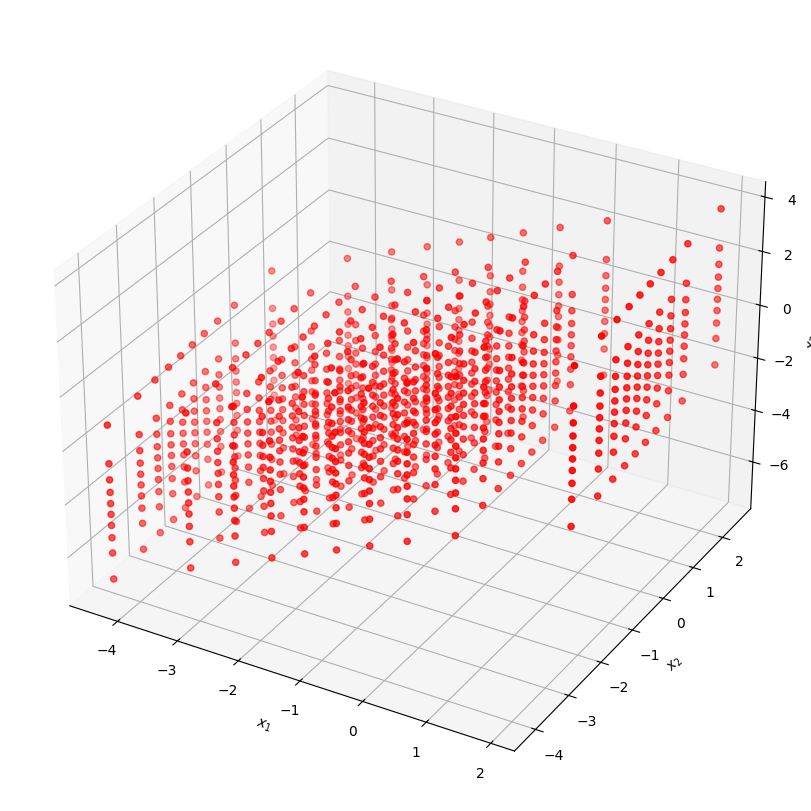

In [6]:
fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx.atoms[0].flatten()),
    np.log(X_approx.atoms[1].flatten()),
    np.log(X_approx.atoms[2].flatten()),
    color="red",
)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()

Now we test a bivariate distribution. One purpose of this test is to examine the approximate CDF values of the discretized distribution. The other is to ensure that the bivariate and the multivariate algorithms produce consistent output when both are applicable.

In [7]:
Σ = np.array([[3.0, 1.0], [1.0, 2.0]])
μ = -np.diag(Σ) / 2  # Create mean-one lognormal

X = HARK.distribution.MVLogNormal(mu=μ, Sigma=Σ)

In [8]:
N = 10

X_approx = X.bv_approx_equiprobable(N)
X_approx.expected()

array([1., 1.])

The following test uses the bivariate implementation.

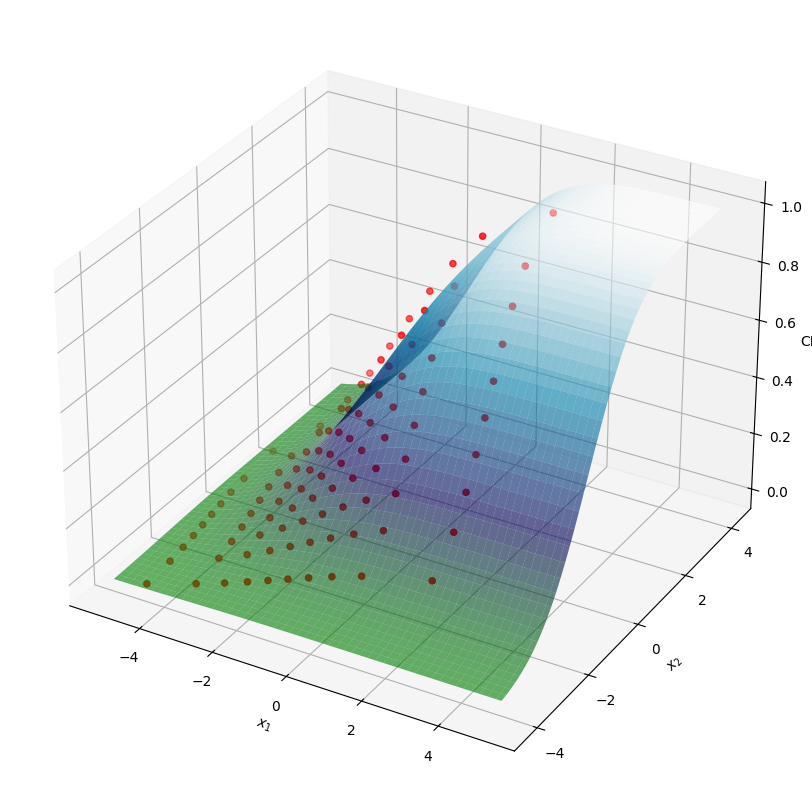

In [9]:
M = 150

σ_1, σ_2 = np.sqrt(np.diag(Σ))

x = np.linspace(-3 * σ_1, 3 * σ_1, M)
y = np.linspace(-3 * σ_2, 3 * σ_2, M)

x, y = np.meshgrid(x, y)
xf = x.flatten()
yf = y.flatten()
xy = np.stack([xf, yf], axis=1)
exy = np.exp(xy)

z = X._cdf(exy).reshape(M, M)

cdf_approx = np.array([[j * (i + 1) / N**2 for i in range(N)] for j in range(1, N + 1)])

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx.atoms[0].flatten()),
    np.log(X_approx.atoms[1].flatten()),
    cdf_approx.flatten(),
    color="red",
)
ax.plot_surface(x, y, z, alpha=0.6, cmap=cm.ocean)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("CDF")
plt.show()

We now test the same problem using the multivariate discretization tool.

In [10]:
N = 10

X_approx2 = X._approx_equiprobable(N)
X_approx2.expected()

array([1., 1.])

Note that the plots of the two discretizations are identical, showing that the algorithm is working well.

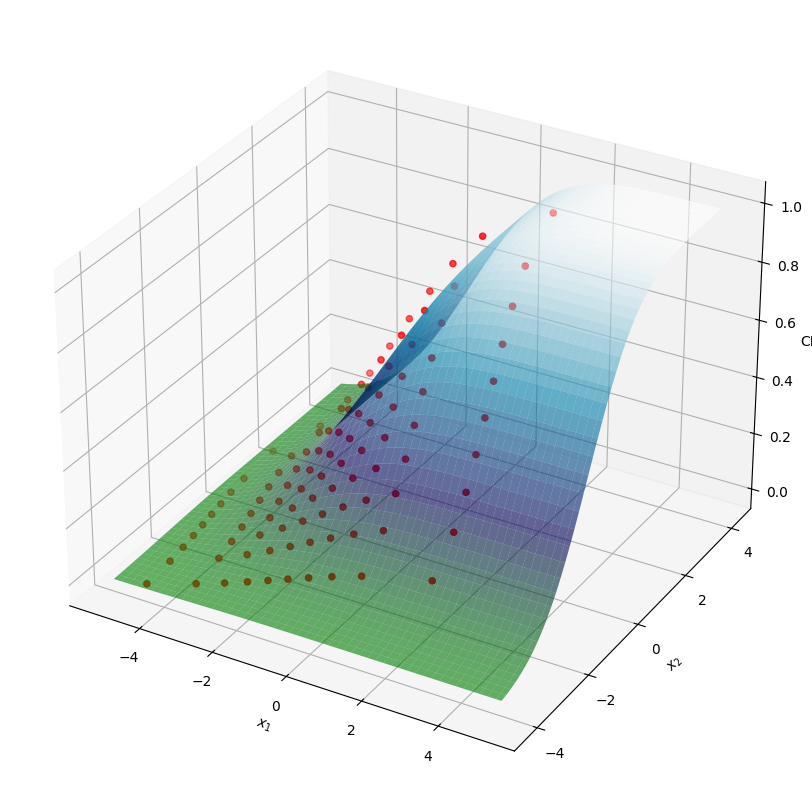

In [11]:
M = 150

σ_1, σ_2 = np.sqrt(np.diag(Σ))

x = np.linspace(-3 * σ_1, 3 * σ_1, M)
y = np.linspace(-3 * σ_2, 3 * σ_2, M)

x, y = np.meshgrid(x, y)
xf = x.flatten()
yf = y.flatten()
xy = np.stack([xf, yf], axis=1)
exy = np.exp(xy)

z = X._cdf(exy).reshape(M, M)

cdf_approx = np.array([[j * (i + 1) / N**2 for i in range(N)] for j in range(1, N + 1)])

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
ax = plt.axes(projection="3d")

ax.scatter(
    np.log(X_approx2.atoms[0].flatten()),
    np.log(X_approx2.atoms[1].flatten()),
    cdf_approx.flatten(),
    color="red",
)
ax.plot_surface(x, y, z, alpha=0.6, cmap=cm.ocean)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("CDF")
plt.show()